In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [2]:
print(os.listdir("../input"))

['amazon_alexa.tsv', 'melb_data.csv']


In [9]:
Data = pd.read_csv("../input/amazon_alexa.tsv",sep='\t')
Data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [15]:
Data.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

## Lets try to classify and Analyze the bad reviews through out this dataset

In [16]:
Data = Data[Data.rating!=5]
Data = Data[Data.rating!=4]

In [1]:
Data.head()

NameError: name 'Data' is not defined

In [18]:
Data.shape

(409, 5)

In [19]:
Data["index"] = range(0,409)
Data = Data.set_index("index")
Data.head()

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

## What porterStemmer actually does...

In [23]:
# It is a process of normalization
text2 = "feet wolves cats talked"
stemmer = PorterStemmer()
Norm_Word= stemmer.stem(text2)
Tokens = text2.split()
" ".join(stemmer.stem(token) for token in Tokens)

'feet wolv cat talk'

In [24]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,409):
    review = re.sub('[^a-zA-Z]', ' ', Data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if not token in STOPWORDS]
    #contain all words that are not in stopwords dictionary
    review=' '.join(review)
    corpus.append(review)
corpus

['without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'got second unit bedroom expect sound improv didnt realli see differ overal big improv st gener',
 'speaker sound pretti good small setup pretti easi bought two reason rate follow instruct synch music unit know done correctli sync primari motiv purchas multipl unit',
 'like siri fact siri answer accur alexa see real need household though good bargain prime day deal',
 'differ appl play specif list music must amazon spotifi plu prime etc account must pay play music star reason everyth els',
 'like googl better',
 'sound terribl u want good music get bose',
 'much featur',
 'annoy everyth show alexa abl download spend much time tri figur phrase machin may well look',
 'know half thing ask recogn sprinkler wifi control even though product detail say compat program chang wifi thermostat set match w



##  Lets find the most commonly used words

In [25]:
words = []
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
words

['without',
 'cellphon',
 'cannot',
 'use',
 'mani',
 'featur',
 'ipad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'live',
 'room',
 'reason',
 'enough',
 'keep',
 'fun',
 'ask',
 'random',
 'question',
 'hear',
 'respons',
 'seem',
 'smartbon',
 'polit',
 'yet',
 'got',
 'second',
 'unit',
 'bedroom',
 'expect',
 'sound',
 'improv',
 'didnt',
 'realli',
 'see',
 'differ',
 'overal',
 'big',
 'improv',
 'st',
 'gener',
 'speaker',
 'sound',
 'pretti',
 'good',
 'small',
 'setup',
 'pretti',
 'easi',
 'bought',
 'two',
 'reason',
 'rate',
 'follow',
 'instruct',
 'synch',
 'music',
 'unit',
 'know',
 'done',
 'correctli',
 'sync',
 'primari',
 'motiv',
 'purchas',
 'multipl',
 'unit',
 'like',
 'siri',
 'fact',
 'siri',
 'answer',
 'accur',
 'alexa',
 'see',
 'real',
 'need',
 'household',
 'though',
 'good',
 'bargain',
 'prime',
 'day',
 'deal',
 'differ',
 'appl',
 'play',
 'specif',
 'list',
 'music',
 'must',
 'amazon',
 'sp

In [26]:
from collections import Counter
words_counts = Counter(words)
print(words_counts)

Counter({'echo': 150, 'work': 140, 'alexa': 108, 'devic': 108, 'use': 88, 'amazon': 84, 'like': 81, 'get': 77, 'dot': 76, 'time': 73, 'sound': 71, 'would': 70, 'speaker': 69, 'music': 60, 'one': 58, 'product': 57, 'tri': 53, 'thing': 53, 'play': 52, 'set': 51, 'need': 48, 'ask': 44, 'want': 44, 'buy': 44, 'connect': 43, 'screen': 43, 'better': 41, 'also': 41, 'qualiti': 40, 'show': 38, 'realli': 37, 'bought': 37, 'even': 37, 'good': 36, 'turn': 36, 'hub': 34, 'know': 33, 'well': 33, 'great': 32, 'much': 31, 'disappoint': 31, 'bulb': 31, 'could': 30, 'still': 30, 'alarm': 29, 'prime': 29, 'day': 29, 'light': 29, 'app': 27, 'back': 27, 'say': 26, 'return': 26, 'home': 26, 'see': 25, 'googl': 25, 'make': 25, 'purchas': 24, 'problem': 24, 'phone': 24, 'hear': 23, 'got': 23, 'stop': 23, 'go': 23, 'seem': 22, 'way': 22, 'money': 22, 'refurbish': 22, 'video': 22, 'question': 21, 'unit': 21, 'wifi': 21, 'mani': 20, 'differ': 20, 'plu': 20, 'understand': 20, 'sure': 20, 'item': 20, 'start': 20,

In [27]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words

[('echo', 150),
 ('work', 140),
 ('alexa', 108),
 ('devic', 108),
 ('use', 88),
 ('amazon', 84),
 ('like', 81),
 ('get', 77),
 ('dot', 76),
 ('time', 73),
 ('sound', 71),
 ('would', 70),
 ('speaker', 69),
 ('music', 60),
 ('one', 58),
 ('product', 57),
 ('tri', 53),
 ('thing', 53),
 ('play', 52),
 ('set', 51),
 ('need', 48),
 ('ask', 44),
 ('want', 44),
 ('buy', 44),
 ('connect', 43),
 ('screen', 43),
 ('better', 41),
 ('also', 41),
 ('qualiti', 40),
 ('show', 38),
 ('realli', 37),
 ('bought', 37),
 ('even', 37),
 ('good', 36),
 ('turn', 36),
 ('hub', 34),
 ('know', 33),
 ('well', 33),
 ('great', 32),
 ('much', 31),
 ('disappoint', 31),
 ('bulb', 31),
 ('could', 30),
 ('still', 30),
 ('alarm', 29),
 ('prime', 29),
 ('day', 29),
 ('light', 29),
 ('app', 27),
 ('back', 27),
 ('say', 26),
 ('return', 26),
 ('home', 26),
 ('see', 25),
 ('googl', 25),
 ('make', 25),
 ('purchas', 24),
 ('problem', 24),
 ('phone', 24),
 ('hear', 23),
 ('got', 23),
 ('stop', 23),
 ('go', 23),
 ('seem', 22),
 (

In [28]:
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

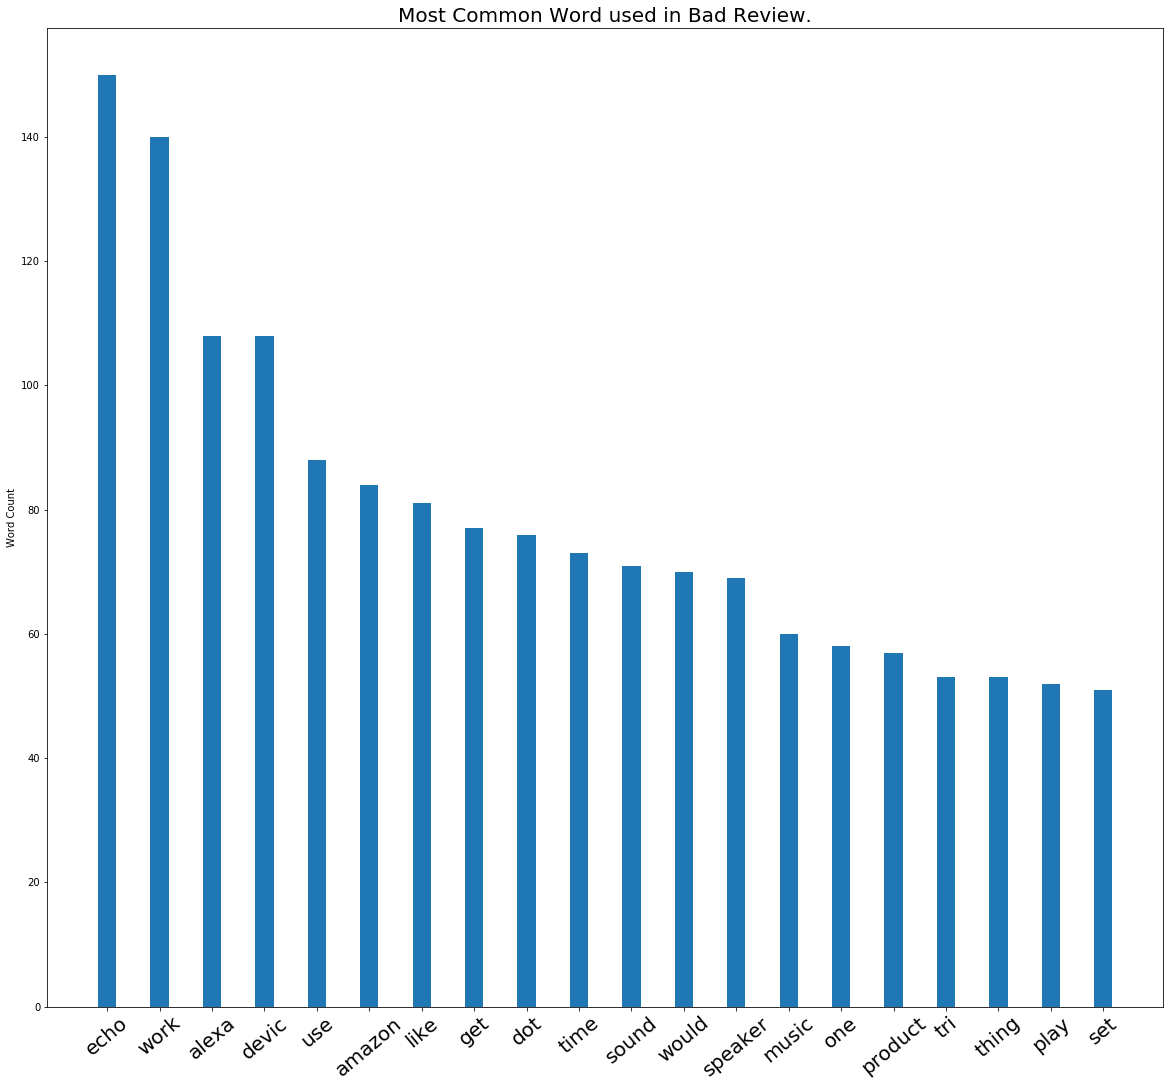

In [29]:
plt.figure(figsize=(20,18))
plt.bar(np.arange(20), most_commmom_CountList[0:20], width=0.35)
plt.ylabel('Word Count')
plt.xticks(np.arange(20), most_commmom_wordList[0:20], fontsize=20, rotation=40)
plt.title('Most Common Word used in Bad Review.', fontsize=20)
plt.show()

# It looks like there need to be a lot of improvement in the Audio system from both hardware and software perspective especially improvement in the audio Output system.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
texts = ["good movie",
         "not a good movie",
         "did not like",
         "I like it",
         "good one"]
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
features = tfidf.fit_transform(texts)
tfidf.get_feature_names()

['good movie', 'like', 'movie', 'not']

In [33]:
Vectorize = TfidfVectorizer(analyzer='word',stop_words='english',ngram_range=(1, 2),min_df=2)
X = Vectorize.fit_transform(corpus).toarray()
y = Data['feedback']

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
model1 = RandomForestClassifier(n_estimators=200, max_features="auto")
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
y_pred1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy for RandomForest:\t"+str(accuracy1))
print("Precision for RandomForest:\t"+str(precision_score(y_test,y_pred1)))
print("Recall for RandomForest:\t"+str(recall_score(y_test,y_pred1)))

Accuracy for RandomForest:	0.7378640776699029
Precision for RandomForest:	0.7272727272727273
Recall for RandomForest:	0.43243243243243246


In [43]:
model2 = GradientBoostingClassifier(learning_rate=1.5, verbose=1, max_features='auto')
model2.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1331            1.51s
         2           1.0331            1.31s
         3           0.9339            1.25s
         4           0.8461            1.16s
         5           0.7497            1.12s
         6           0.6805            1.06s
         7           0.6068            1.01s
         8           0.5270            0.98s
         9           0.4695            0.95s
        10           0.4261            0.92s
        20           0.2074            0.74s
        30           0.1582            0.63s
        40           0.1413            0.52s
        50           0.1308            0.43s
        60           0.1274            0.35s
        70           0.1251            0.26s
        80           0.1241            0.17s
        90           0.1234            0.09s
       100           0.1231            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.5, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [ ]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test,y_pred2)
print("Accuracy for GradientBoosting:\t"+str(accuracy2))
print("Precision for GradientBoosting:\t"+str(precision_score(y_test,y_pred2)))
print("Recall for GradientBoosting:\t"+str(recall_score(y_test,y_pred2)))